<a href="https://colab.research.google.com/github/uday203363/DSA0216-cv-192424190/blob/main/Activity_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving malignant (189).png to malignant (189).png


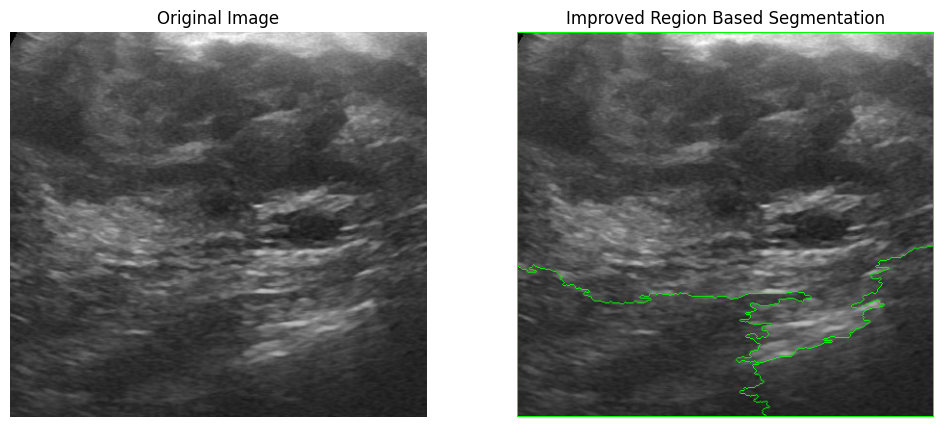

✅ Region Based Segmentation Completed
📁 Saved as region_based_output.png


In [10]:
!pip install opencv-python pillow

from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5,5), 0)
gray = cv2.medianBlur(gray, 5)
_, thresh = cv2.threshold(
    gray, 0, 255,
    cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
)
kernel = np.ones((3,3), np.uint8)

opening = cv2.morphologyEx(
    thresh, cv2.MORPH_OPEN,
    kernel, iterations=2
)
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(
    dist_transform,
    0.5 * dist_transform.max(),
    255, 0
)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
_, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1
markers[unknown == 255] = 0
markers = cv2.watershed(img, markers)
img[markers == -1] = [0, 255, 0]
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Improved Region Based Segmentation")
plt.axis("off")
plt.show()
cv2.imwrite("region_based_output.png", img)
print("✅ Region Based Segmentation Completed")
print("📁 Saved as region_based_output.png")
